In [163]:
#Transfer Matrix Method for CROW containing 10 rings.
import numpy as np
import matplotlib.pyplot as plt

In [164]:
#Inter-ring coupling and Waveguide-ring coupling

k = -0.19j # coupling between individual rings
k_in = k_out = -0.1j #coupling between input/output waveguide and CROW

t = np.sqrt(1 - abs(k)**2)
t_in  = np.sqrt(1 - abs(k_in)**2)

c = 3e8  # speed of light (m/s)
R = 164.5e-6  # ring radius in meters
L = 2 * np.pi * R  # ring circumference
m = 100  # integer resonance mode number (for 1.5 µm)

lambdas = np.linspace(1430e-9, 1437e-9, 100000)  # wavelength sweep in meters
omegas = 2 * np.pi * c / lambdas  # angular frequency
freqs = c / lambdas  # frequency in Hz

In [165]:
# Defining the P matrices

P = (1/k)*np.array([[-t, 1], [-1, np.conj(t)]])
P_in = (1/k_in)*np.array([[-t_in, 1], [-1, np.conj(t_in)]])
P_out = P_in #**

In [166]:
#print(P)
#print(P_out)
#print(P_in)

In [167]:
#The matrix Q will be defined inside the loop while defining the transfer matrices for each ring as it is frequency dependent, where frequency is set by the input signal.
#Two types of transfer matrices - through and output ports
#Defining two empty arrays for through and drop port transmittances
t_thr = []
t_drop = []
p_thr = []
p_drop = []
N = 11 #number of rings in the CROWs
n_eff = 1 #effective refractive index - r.i. at a particular frequency (otherwise it is also frequency dependent)

 #defining the wavelength range for the input signal. Resolving into 1000 points.

for omega in omegas:
    beta = ((n_eff * omega)/ c) #no imaginary component
    phase = beta * R * np.pi
    Q = np.array([[0, np.exp(-1j * phase)],[np.exp(1j * phase), 0]])
   # print(Q)
    #now P and Q need to multiplied N-1 times for which we must define an identity matrix to initialise their product.
    I = np.eye(2) #a 2x2 identity matrix
    for _ in range(N-1):
        I = P @ Q @ I

    #total transfer matrix
    T = P_out @ Q @ I @ P_in

    #separating matrix components
    A = T[0,0]
    B = T[0,1]
    C = T[1,0]
    D = T[1,1]
    #print (T)
    T_thr = -A/B
    T_out = C - ((A*D)/B)

    phase_thr = np.angle(T_thr)
    phase_out = np.angle(T_out)

    #unwrap not working!!

   # print(A,B,C,D)
  #  print(T_thr)

    #since these are complex values, in order to plot them we will store these as their absolute values.
    t_thr.append(abs(T_thr)**2)
    t_drop.append(abs(T_out)**2)

    p_thr.append(phase_thr)
    p_drop.append(phase_out)
    



In [168]:
print(t_thr[77])

0.9999999999999998


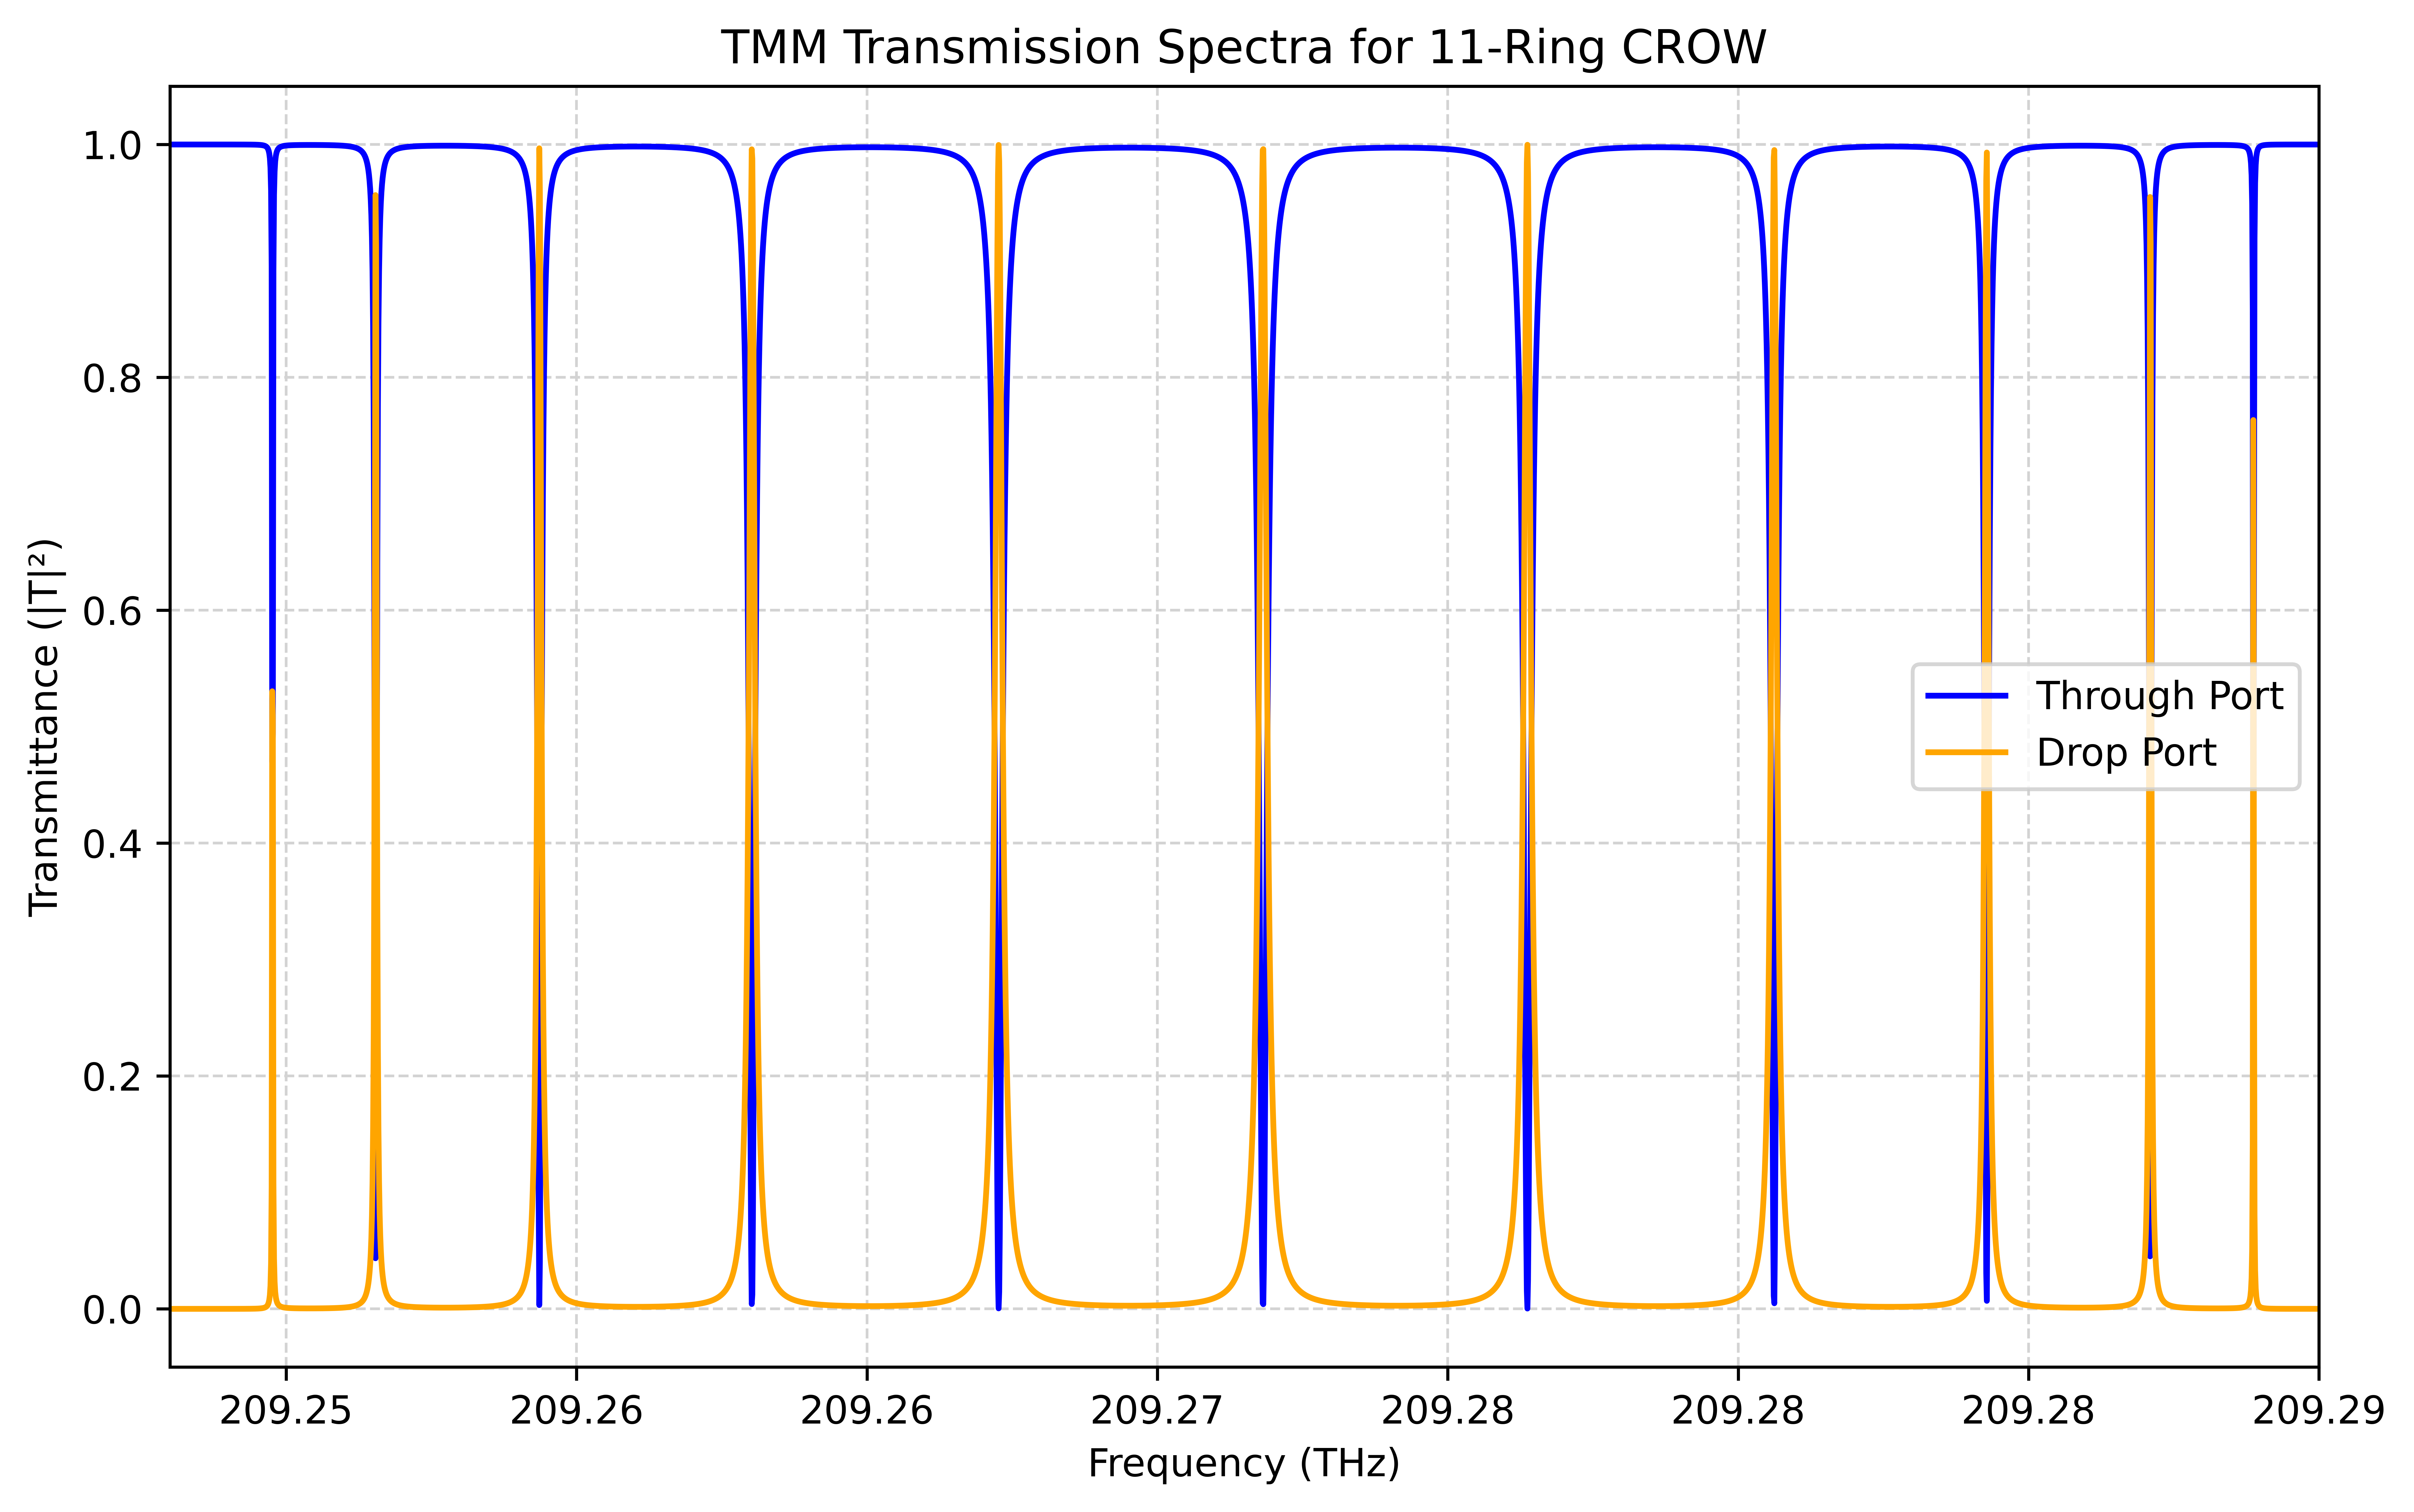

In [181]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 6), dpi=1000)

ax.plot(freqs*1e-12, t_thr, label='Through Port', color='blue')
ax.plot(freqs*1e-12, t_drop, label='Drop Port', color='orange')

ax.set_xlabel("Frequency (THz)")
ax.set_ylabel("Transmittance (|T|²)")
ax.set_xlim(2.09253e14*1e-12, 2.0929e14*1e-12)
ax.set_title("TMM Transmission Spectra for 11-Ring CROW")

# Apply formatter (show 4 decimals, e.g. 2.0925)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{x:.2f}")
)

ax.legend()
ax.grid(True, color="lightgrey", linestyle="--", linewidth=0.7)
plt.show()


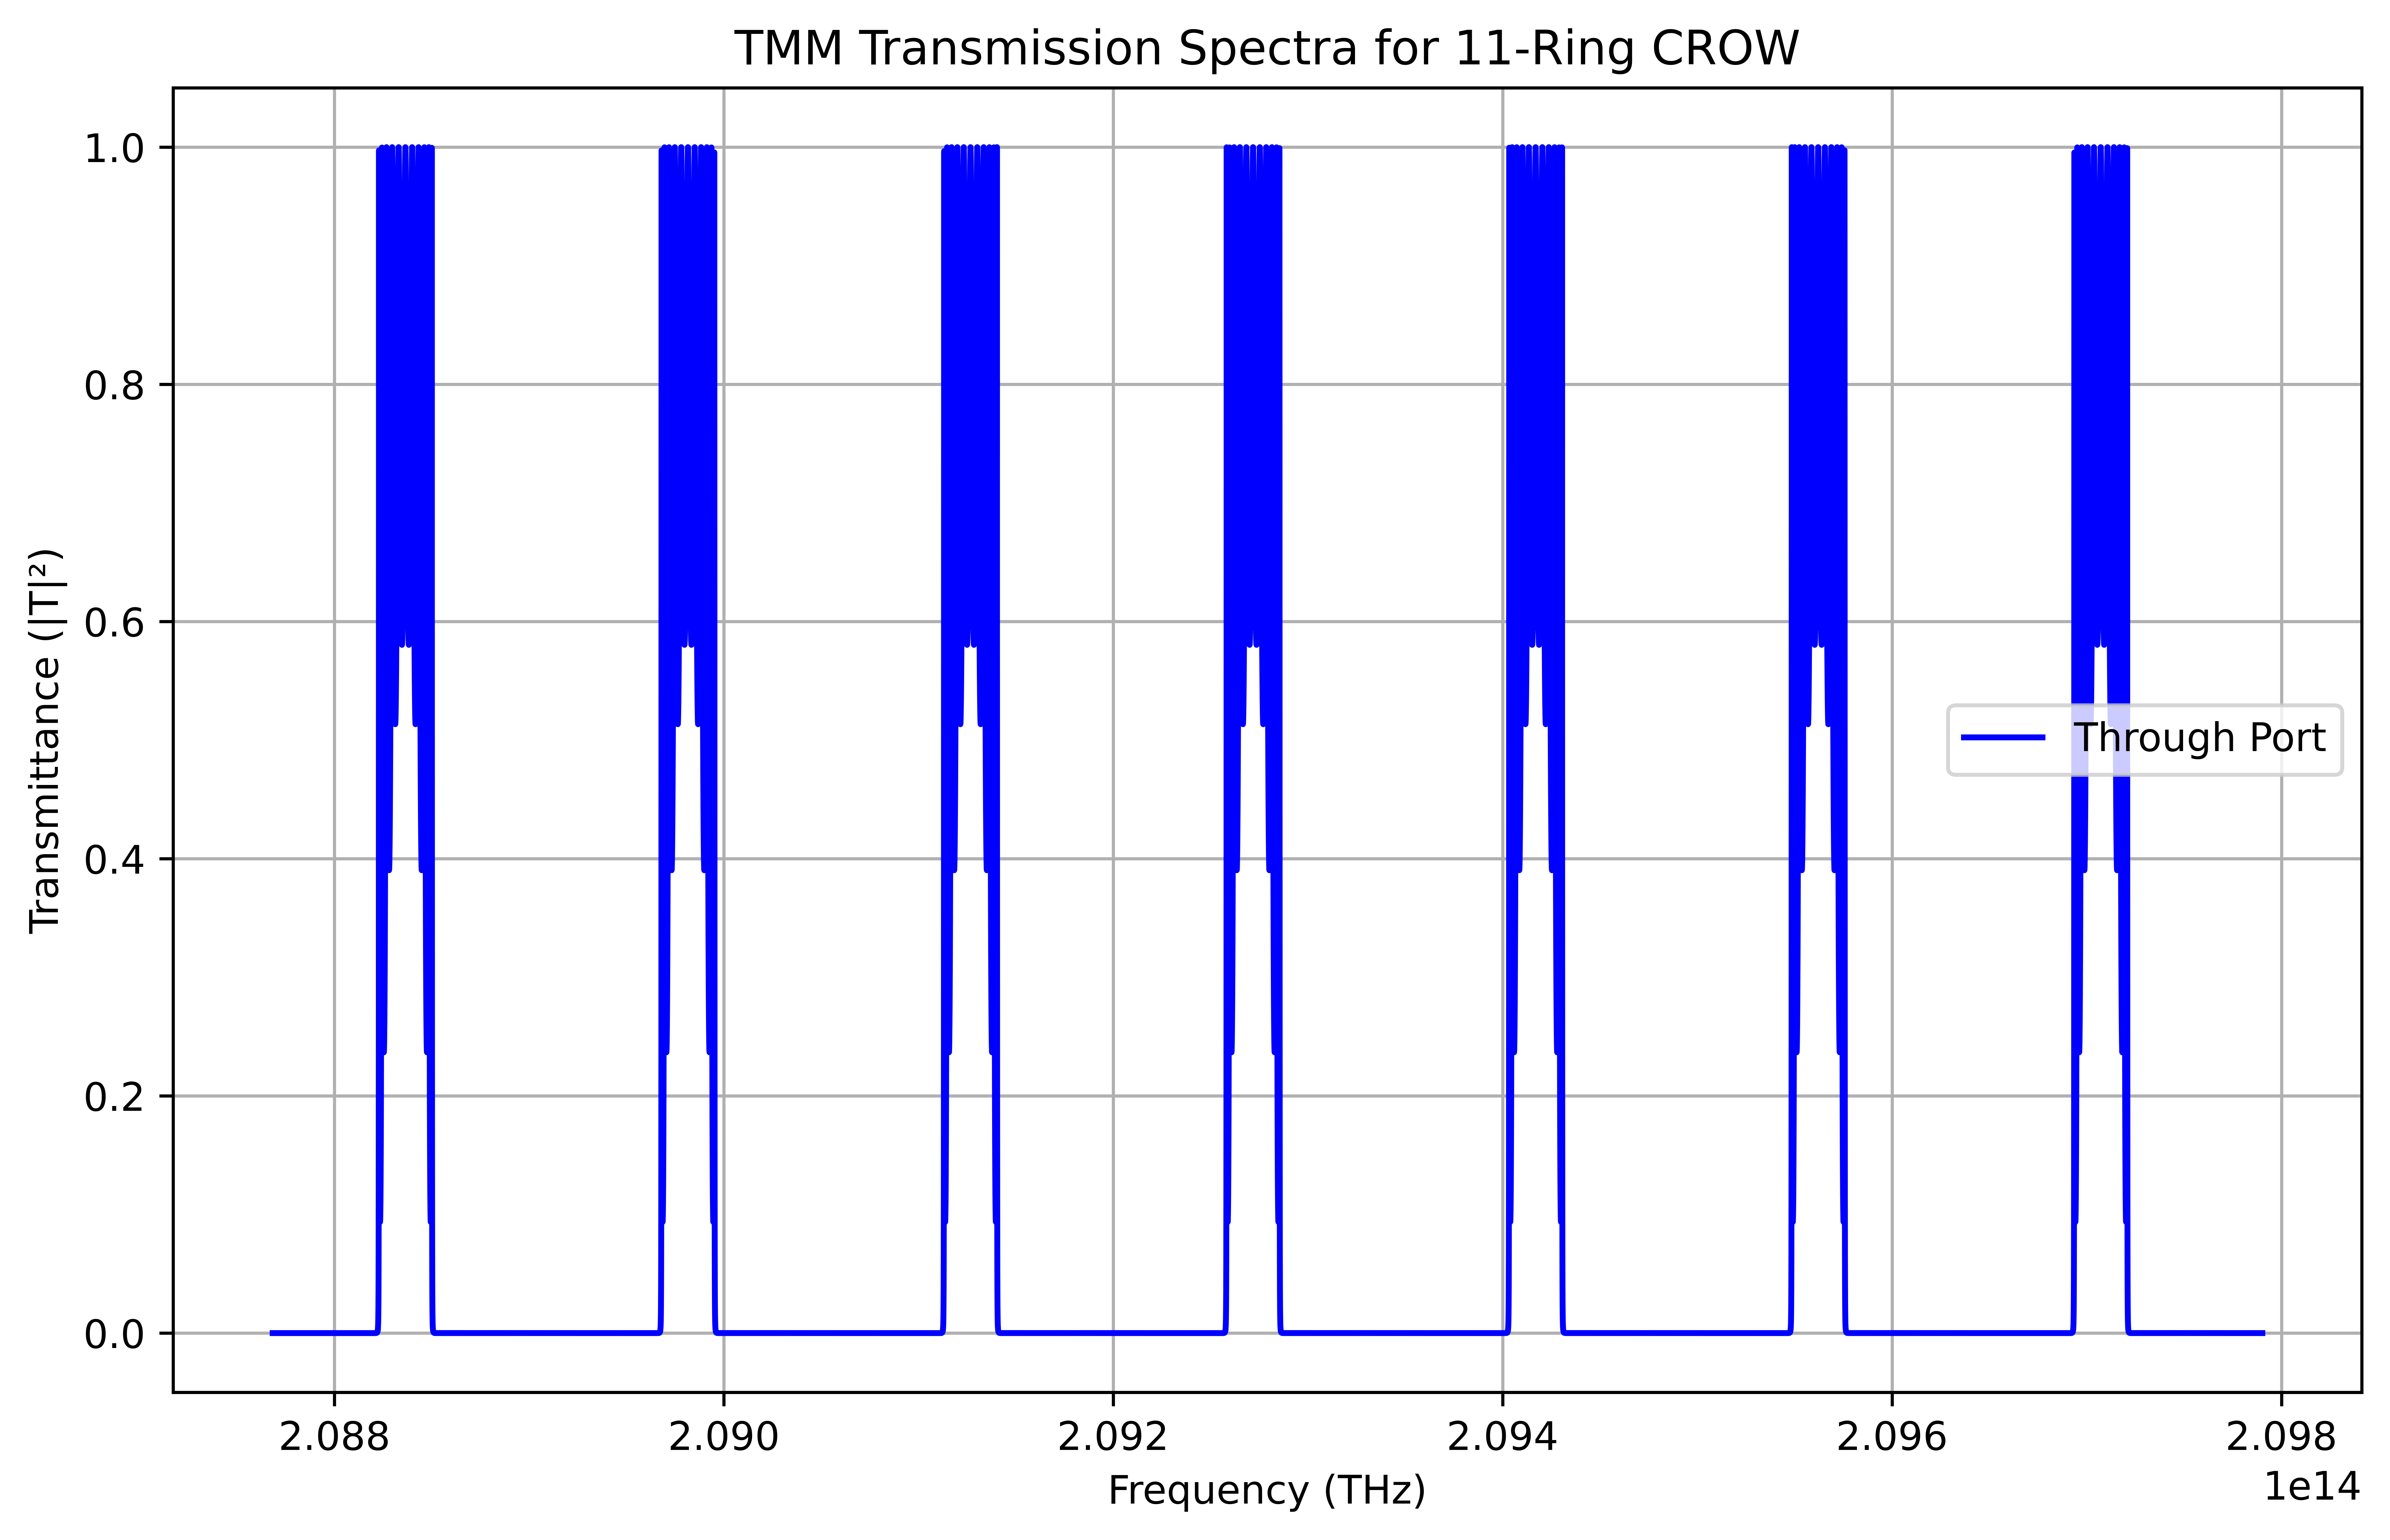

In [139]:
#Plotting the transmittance
plt.figure(figsize=(10, 6), dpi=1000)
plt.plot(freqs, t_drop, label='Through Port', color='blue')
plt.xlabel("Frequency (THz)")
plt.ylabel("Transmittance (|T|²)")
# plt.xlim(2.0925e14,2.0930e14)
plt.title("TMM Transmission Spectra for 11-Ring CROW")
plt.legend()
plt.grid(True)
plt.show()

In [96]:
# plt.figure(figsize=(10, 6))
# plt.plot(lambdas, t_thr, label='Through Port', color='red')
# plt.xlabel("Wavelength (um)")
# plt.ylabel("Transmittance (|T|²)")
# plt.title("Transmission Spectra for 10-Ring CROW")
# plt.legend()
# plt.grid(True)
# plt.show()

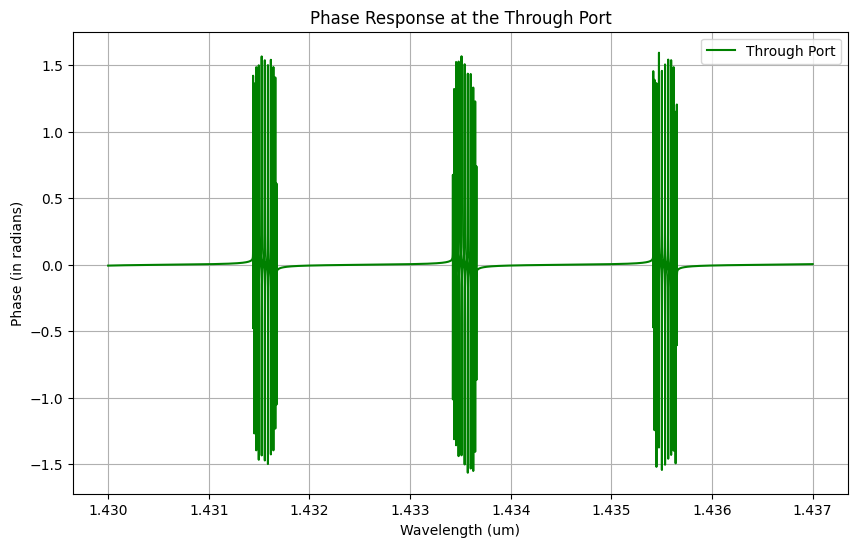

In [97]:
#Plotting the phase response (Through Port)
plt.figure(figsize=(10, 6))
plt.plot(lambdas*1e6, p_thr, label='Through Port', color='green')
plt.xlabel("Wavelength (um)")
plt.ylabel("Phase (in radians)")
plt.title("Phase Response at the Through Port")
plt.legend()
plt.grid(True)
plt.show()

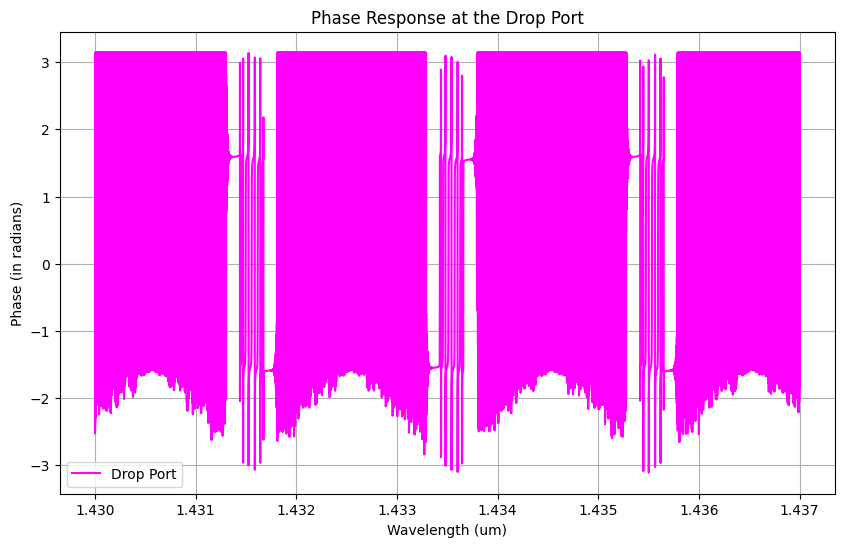

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(lambdas*1e6, p_drop, label='Drop Port', color='magenta')
plt.xlabel("Wavelength (um)")
plt.ylabel("Phase (in radians)")
plt.title("Phase Response at the Drop Port")
plt.legend()
plt.grid(True)
plt.show()
#NEEDS FIXING!!